In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [16]:
FILE_NAME = 'analog_pwm_data_2.txt'

In [19]:
analog_data = pd.read_csv(FILE_NAME)

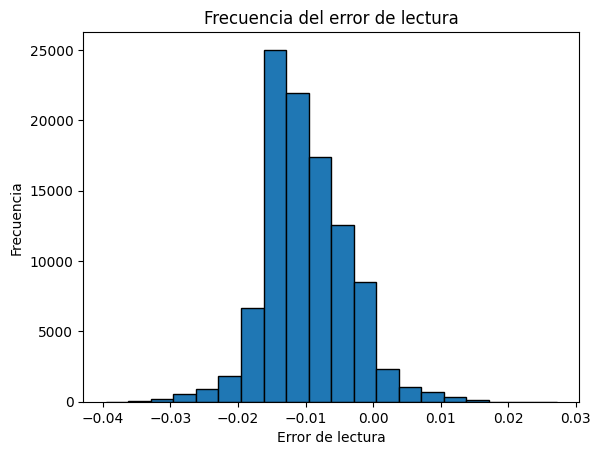

In [20]:
analog_data['error'] = analog_data['read_val'] - analog_data['ratio']

# Crear un histograma del tamaño del error
plt.hist(analog_data['error'], bins=20, edgecolor='black')
plt.title('Frecuencia del error de lectura')
plt.xlabel('Error de lectura')
plt.ylabel('Frecuencia')
plt.show()


# Reading error analysis by ratio
We will group every ratio and make a mean for the reading error.

In [7]:
def error_by_ratio(df, title):
    plt.plot(df['ratio'], df['error'])
    plt.ylabel('Media de Error')
    plt.xlabel('Ratio')
    plt.title(title)

### Reading error by ratio for all the different configs together

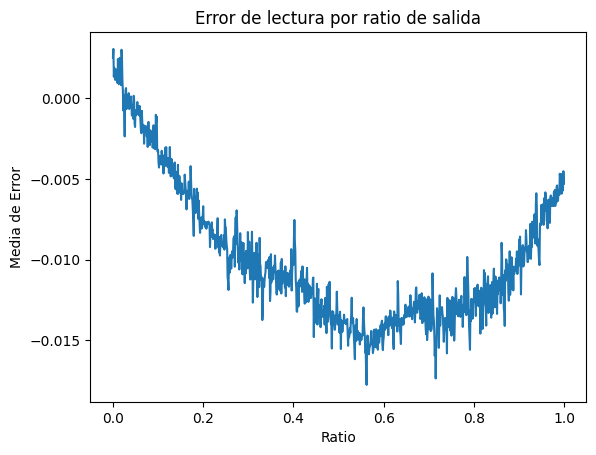

In [21]:
new_data = analog_data.groupby('ratio')['error'].mean().reset_index()
error_by_ratio(new_data, 'Error de lectura por ratio de salida')

### Comparison between reading error by ratio for configs A and B

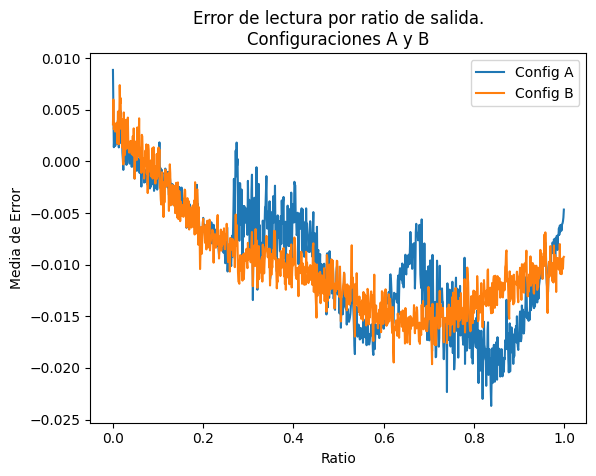

In [22]:
# Comparison between errors in config A and B
# Config A: Frequency IN = 5 kHz | Frequency OUT = 10 kHz
# Config B: Frequency IN = 10 kHz  | Frequency OUT = 10 kHz
analog_data_a = analog_data[(analog_data['frequency_out'] == 10000) & (analog_data['frequency_in'] == 5000)]
percentual_error_by_ratio_a = analog_data_a.groupby('ratio')['error'].mean().reset_index()
analog_data_b = analog_data[(analog_data['frequency_out'] == 10000) & (analog_data['frequency_in'] == 10000)]
percentual_error_by_ratio_b = analog_data_b.groupby('ratio')['error'].mean().reset_index()

# One is for config A and the other is for config B.
error_by_ratio(percentual_error_by_ratio_a, 'Error de lectura por ratio de salida.\nConfiguraciones A y B')
error_by_ratio(percentual_error_by_ratio_b, 'Error de lectura por ratio de salida.\nConfiguraciones A y B')
plt.legend(['Config A', 'Config B'], loc='upper right')


### Comparison between reading error by ratio for configs B and C

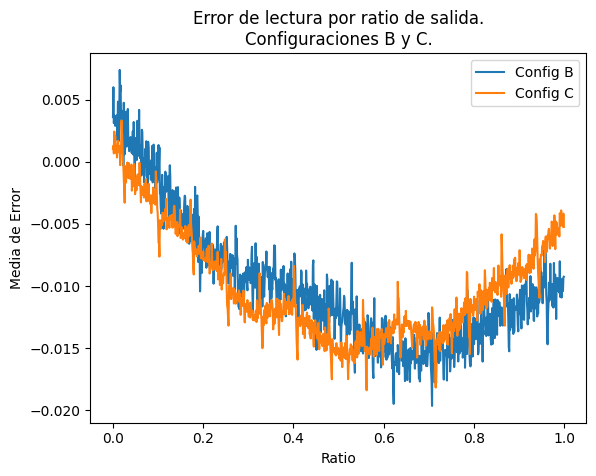

In [23]:
# Comparison between errors in config B and C
# Config B: Frequency IN = 10 kHz | Frequency OUT = 10 kHz
# Config C: Frequency IN = 20 kHz | Frequency OUT = 10 kHz
analog_data_c = analog_data[(analog_data['frequency_out'] == 10000) & (analog_data['frequency_in'] == 20000)]
percentual_error_by_ratio_c = analog_data_c.groupby('ratio')['error'].mean().reset_index()

# One is for config B and the other is for config C.
error_by_ratio(percentual_error_by_ratio_b, 'Error de lectura por ratio de salida.\nConfiguraciones B y C.')
error_by_ratio(percentual_error_by_ratio_c, 'Error de lectura por ratio de salida.\nConfiguraciones B y C.')
plt.legend(['Config B', 'Config C'], loc='upper right')

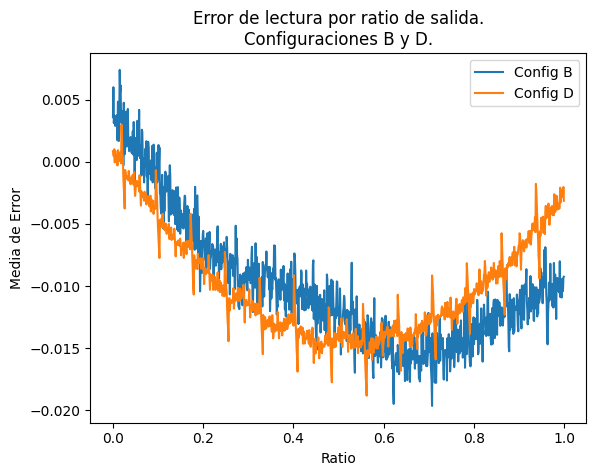

In [25]:
# Comparison between errors in config B and D
# Config B: Frequency IN = 10 kHz | Frequency OUT = 10 kHz
# Config D: Frequency IN = 40 kHz | Frequency OUT = 10 kHz
analog_data_d = analog_data[(analog_data['frequency_out'] == 10000) & (analog_data['frequency_in'] == 40000)]
percentual_error_by_ratio_d = analog_data_d.groupby('ratio')['error'].mean().reset_index()

# One is for config B and the other is for config D.
error_by_ratio(percentual_error_by_ratio_b, 'Error de lectura por ratio de salida.\nConfiguraciones B y D.')
error_by_ratio(percentual_error_by_ratio_d, 'Error de lectura por ratio de salida.\nConfiguraciones B y D.')
plt.legend(['Config B', 'Config D'], loc='upper right')

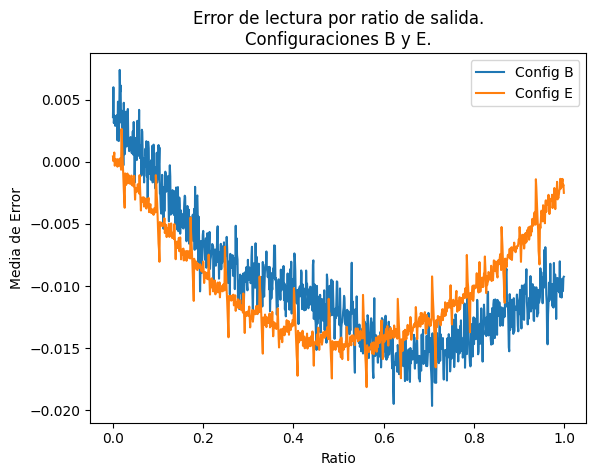

In [28]:
# Comparison between errors in config B and E
# Config B: Frequency IN = 10 kHz | Frequency OUT = 10 kHz
# Config D: Frequency IN = 60 kHz | Frequency OUT = 10 kHz
analog_data_e = analog_data[(analog_data['frequency_out'] == 10000) & (analog_data['frequency_in'] == 60000)]
percentual_error_by_ratio_e = analog_data_e.groupby('ratio')['error'].mean().reset_index()

# One is for config B and the other is for config E.
error_by_ratio(percentual_error_by_ratio_b, 'Error de lectura por ratio de salida.\nConfiguraciones B y E.')
error_by_ratio(percentual_error_by_ratio_d, 'Error de lectura por ratio de salida.\nConfiguraciones B y E.')
plt.legend(['Config B', 'Config E'], loc='upper right')

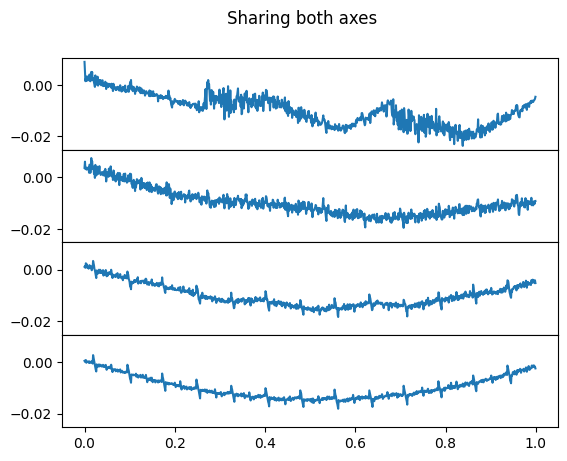

In [29]:
fig = plt.figure()
gs = fig.add_gridspec(4, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')

axs[0].plot(percentual_error_by_ratio_a['ratio'], percentual_error_by_ratio_a['error'])
axs[1].plot(percentual_error_by_ratio_b['ratio'], percentual_error_by_ratio_b['error'])
axs[2].plot(percentual_error_by_ratio_c['ratio'], percentual_error_by_ratio_c['error'])
axs[3].plot(percentual_error_by_ratio_d['ratio'], percentual_error_by_ratio_d['error'])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

In [31]:
analog_data_2 = pd.read_csv('analog_pwm_data.txt')

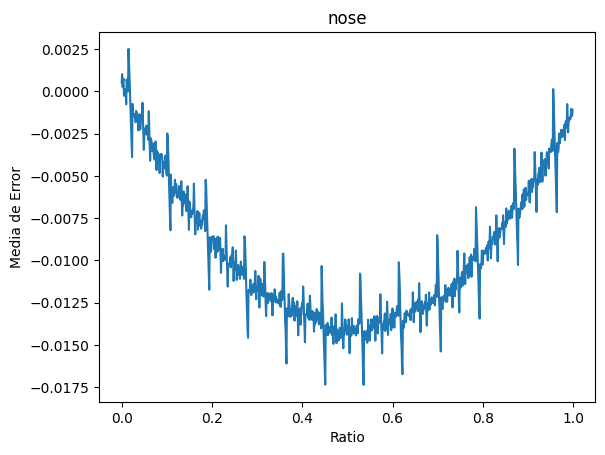

In [33]:
analog_data_2['error'] = analog_data_2['read_val'] - analog_data_2['ratio']
equal = analog_data_2[(analog_data_2['frequency_out'] == 10000) & (analog_data_2['frequency_in'] == 10000)]
equal = equal.groupby('ratio')['error'].mean().reset_index()
error_by_ratio(equal, 'nose')

# Testing done correctly

In [43]:
analog_data_3 = pd.read_csv('analog_pwm_data_3.txt')

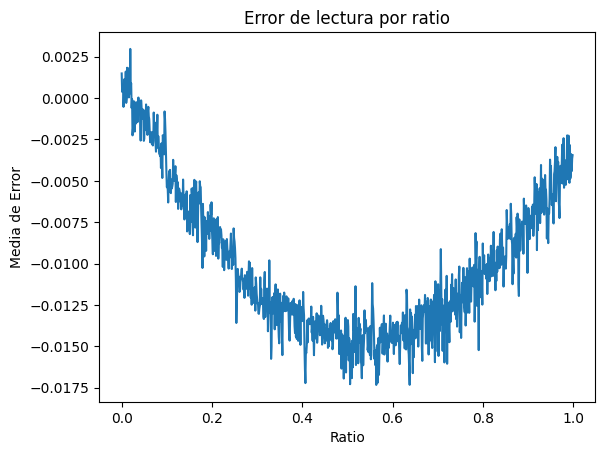

In [78]:
analog_data_3['error'] = analog_data_3['read_val'] - analog_data_3['ratio']
config_5000 = analog_data_3[(analog_data_3['frequency_out'] == 10000) & (analog_data_3['frequency_in'] == 5000)]
config_5000 = config_5000.groupby('ratio')['error'].mean().reset_index()
error_by_ratio(config_5000, 'Error de lectura por ratio')

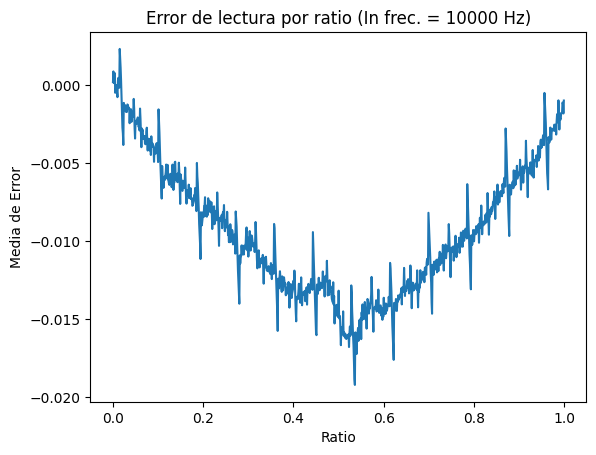

In [79]:
config_10000 = analog_data_3[(analog_data_3['frequency_out'] == 10000) & (analog_data_3['frequency_in'] == 10000)]
config_10000 = config_10000.groupby('ratio')['error'].mean().reset_index()
error_by_ratio(config_10000, 'Error de lectura por ratio (In frec. = 10000 Hz)')

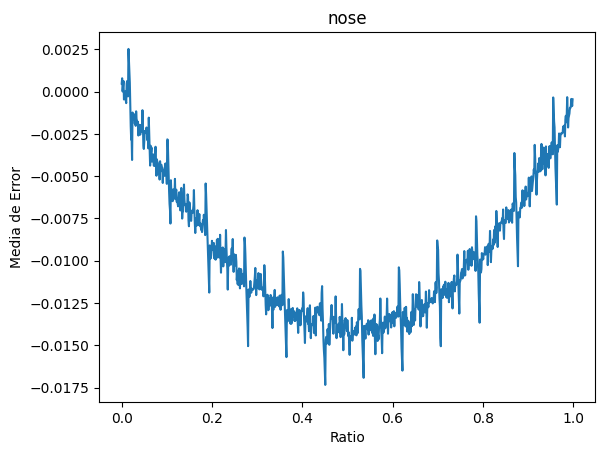

In [80]:
config_20000 = analog_data_3[(analog_data_3['frequency_out'] == 10000) & (analog_data_3['frequency_in'] == 20000)]
config_20000 = config_20000.groupby('ratio')['error'].mean().reset_index()
error_by_ratio(config_20000, 'nose')

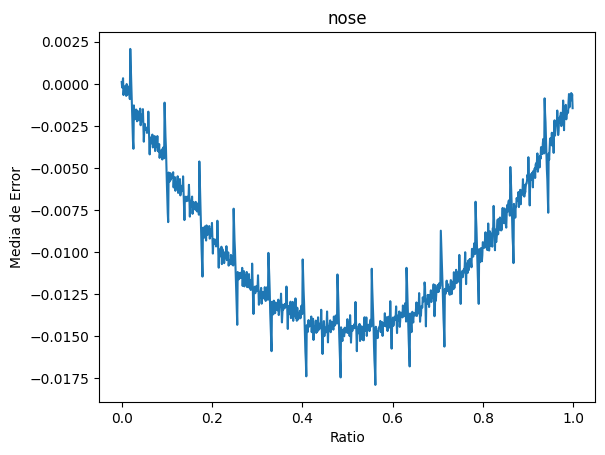

In [81]:
config_40000 = analog_data_3[(analog_data_3['frequency_out'] == 10000) & (analog_data_3['frequency_in'] == 40000)]
config_40000 = config_40000.groupby('ratio')['error'].mean().reset_index()
error_by_ratio(config_40000, 'nose')

Text(0.5, 1.0, 'Error de lectura por ratio.')

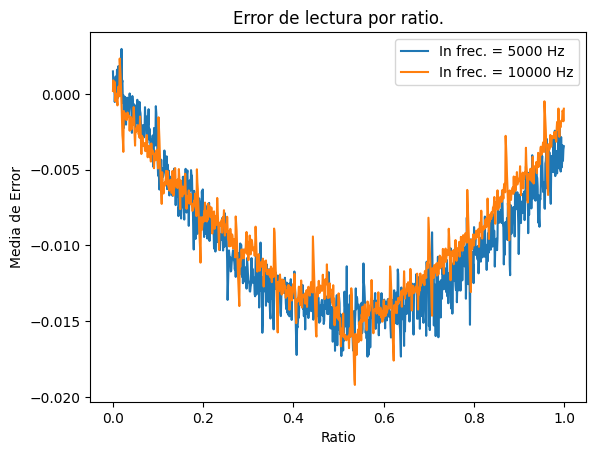

In [85]:
error_by_ratio(config_5000, '')
error_by_ratio(config_10000, '')
plt.legend(['In frec. = 5000 Hz', 'In frec. = 10000 Hz'])
plt.title('Error de lectura por ratio.')

Text(0.5, 1.0, 'Error de lectura por ratio.')

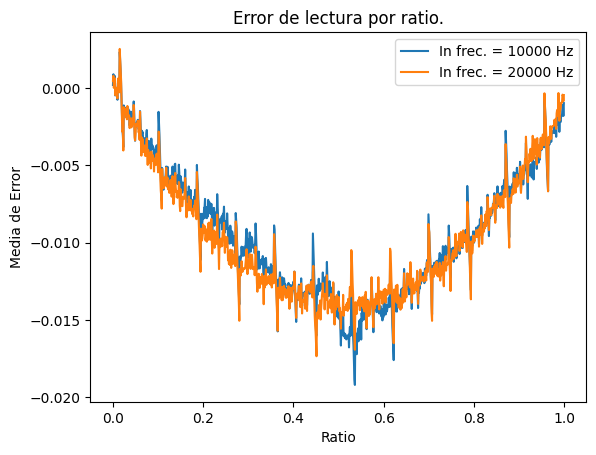

In [91]:
error_by_ratio(config_10000, '')
error_by_ratio(config_20000, '')
plt.legend(['In frec. = 10000 Hz', 'In frec. = 20000 Hz'])
plt.title('Error de lectura por ratio.')

Text(0.5, 1.0, 'Error de lectura por ratio.')

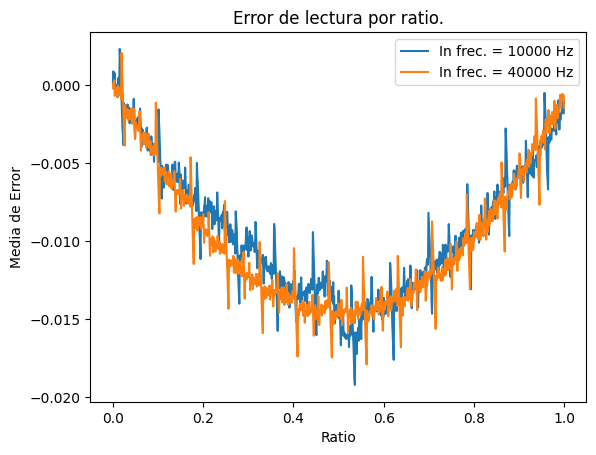

In [92]:
error_by_ratio(config_10000, '')
error_by_ratio(config_40000, '')
plt.legend(['In frec. = 10000 Hz', 'In frec. = 40000 Hz'])
plt.title('Error de lectura por ratio.')

Text(0.5, 1.0, 'Error de lectura por ratio.')

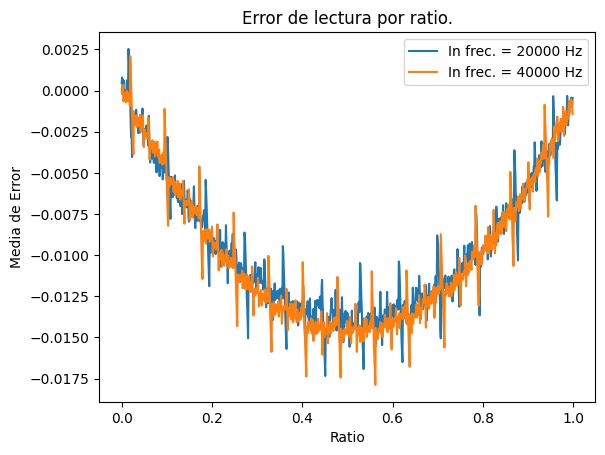

In [93]:
error_by_ratio(config_20000, '')
error_by_ratio(config_40000, '')
plt.legend(['In frec. = 20000 Hz', 'In frec. = 40000 Hz'])
plt.title('Error de lectura por ratio.')

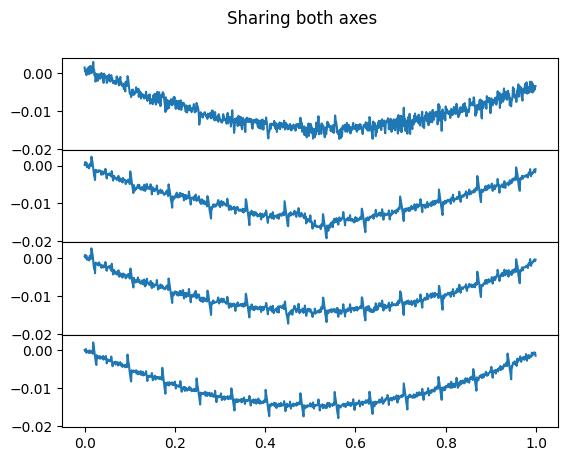

In [95]:
fig = plt.figure()
gs = fig.add_gridspec(4, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')

axs[0].plot(config_5000['ratio'], config_5000['error'])
axs[1].plot(config_10000['ratio'], config_10000['error'])
axs[2].plot(config_20000['ratio'], config_20000['error'])
axs[3].plot(config_40000['ratio'], config_40000['error'])

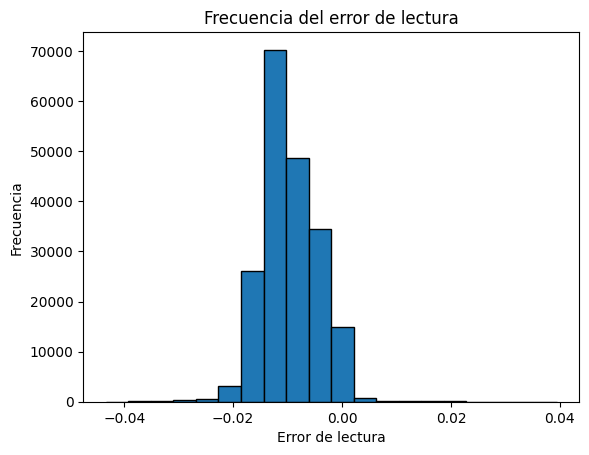

In [53]:
plt.hist(analog_data_3['error'], bins=20, edgecolor='black')
plt.title('Frecuencia del error de lectura')
plt.xlabel('Error de lectura')
plt.ylabel('Frecuencia')
plt.show()

In [55]:
analog_data_3[analog_data_3['error'] > 0.03]

,iteration,frequency_in,frequency_out,resolution_out,ratio,read_val,error
103675,0,5000,10000,12,0.012,0.0446,0.0326
111045,0,5000,10000,12,0.015,0.0482,0.0332
121825,0,5000,10000,12,0.019,0.0534,0.0344
133105,0,5000,10000,12,0.080,0.1110,0.0310
134315,0,5000,10000,12,0.043,0.0748,0.0318
136185,0,5000,10000,12,0.051,0.0810,0.0300
147535,0,5000,10000,12,0.091,0.1236,0.0326
155195,0,5000,10000,12,0.012,0.0514,0.0394
163825,0,5000,10000,12,0.009,0.0440,0.0350
175775,0,5000,10000,12,0.040,0.0752,0.0352


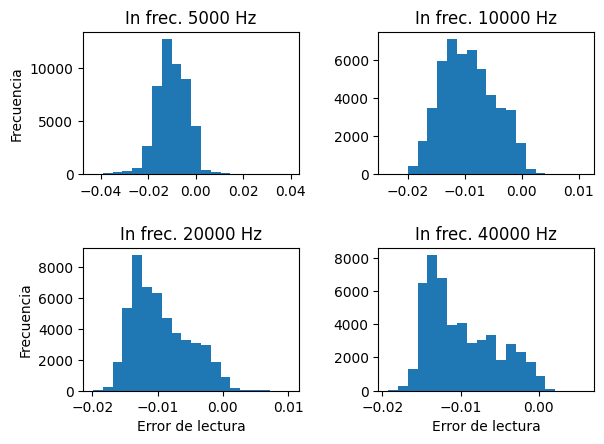

In [69]:
# 10 and 10
config_10000_hist = analog_data_3[analog_data_3['frequency_in'] == 10000]
# 10 and 5
config_5000_hist = analog_data_3[analog_data_3['frequency_in'] == 5000]
# 10 and 20
config_20000_hist = analog_data_3[analog_data_3['frequency_in'] == 20000]
# 10 and 40
config_40000_hist = analog_data_3[analog_data_3['frequency_in'] == 40000]


fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(config_5000_hist['error'], bins=20)
axs[0, 0].set(ylabel= 'Frecuencia')
axs[0, 0].set_title('In frec. 5000 Hz')

axs[0, 1].hist(config_10000_hist['error'], bins=20)
axs[0, 1].set_title('In frec. 10000 Hz')

axs[1, 0].hist(config_20000_hist['error'], bins=20)
axs[1, 0].set(xlabel= 'Error de lectura', ylabel='Frecuencia')
axs[1, 0].set_title('In frec. 20000 Hz')

axs[1, 1].hist(config_40000_hist['error'], bins=20)
axs[1, 1].set(xlabel= 'Error de lectura')
axs[1, 1].set_title('In frec. 40000 Hz')
fig.tight_layout(pad=2.0)





(array([5.900e+01, 2.350e+02, 1.866e+03, 5.341e+03, 8.766e+03, 6.682e+03,
        6.313e+03, 4.688e+03, 3.758e+03, 3.308e+03, 3.065e+03, 2.941e+03,
        1.875e+03, 8.620e+02, 1.450e+02, 4.500e+01, 2.400e+01, 1.700e+01,
        7.000e+00, 3.000e+00]),
 array([-0.0199  , -0.018395, -0.01689 , -0.015385, -0.01388 , -0.012375,
        -0.01087 , -0.009365, -0.00786 , -0.006355, -0.00485 , -0.003345,
        -0.00184 , -0.000335,  0.00117 ,  0.002675,  0.00418 ,  0.005685,
         0.00719 ,  0.008695,  0.0102  ]),
 <BarContainer object of 20 artists>)

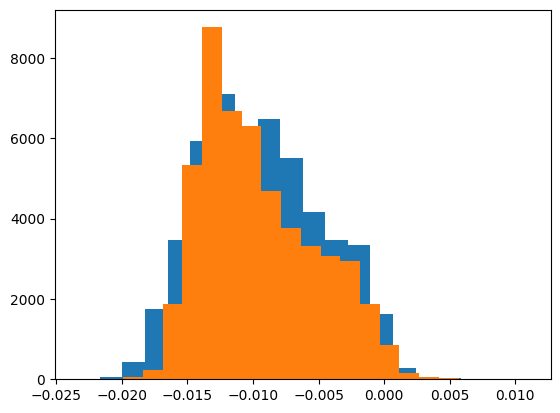

In [71]:
plt.hist(config_10000_hist['error'], bins=20)
plt.hist(config_20000_hist['error'], bins=20)

# Error con el sleep diferente

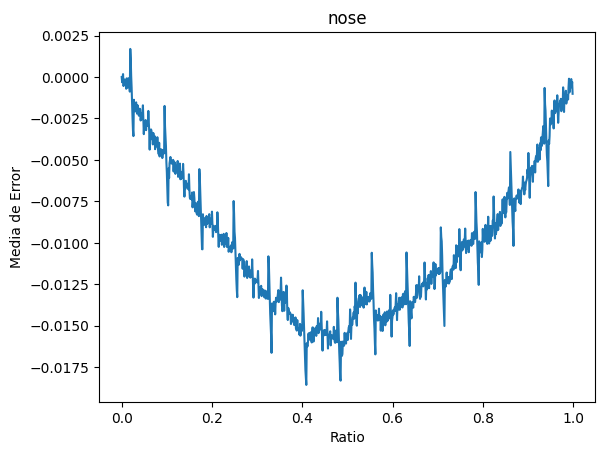

In [54]:
analog_data_sleep_changed = pd.read_csv('analog_pwm_data_sleep_change.txt')
analog_data_sleep_changed['error'] = analog_data_sleep_changed['read_val'] - analog_data_sleep_changed['ratio']
config_10000 = analog_data_sleep_changed[(analog_data_sleep_changed['frequency_out'] == 10000) & (analog_data_sleep_changed['frequency_in'] == 10000)]
config_10000 = config_10000.groupby('ratio')['error'].mean().reset_index()
error_by_ratio(config_10000, 'nose')

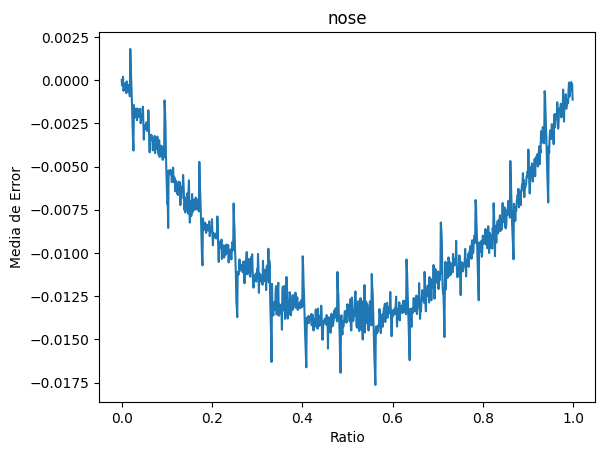

In [70]:
analog_data_sleep_changed = pd.read_csv('analog_pwm_data_sleep_change.txt')
analog_data_sleep_changed['error'] = analog_data_sleep_changed['read_val'] - analog_data_sleep_changed['ratio']
config_20000 = analog_data_sleep_changed[(analog_data_sleep_changed['frequency_out'] == 10000) & (analog_data_sleep_changed['frequency_in'] == 20000)]
config_20000 = config_20000.groupby('ratio')['error'].mean().reset_index()
error_by_ratio(config_20000, 'nose')